# **Predicting Employee Retention**

The objective is to develop a Logistic Regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure.

## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In [256]:
# Import the libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [257]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [258]:
# Load the dataset
df = pd.read_csv('/content/Employee_data.csv')

In [259]:
# Check the first few entries
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [260]:
# Inspect the shape of the dataset
df.shape

(74610, 24)

In [261]:
# Inspect the different columns in the dataset
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

In [262]:
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
count,74610.000000,74610.000000,74610.000000,74610.000000,74610.000000,72698.000000,74610.000000,72197.000000
mean,37246.028696,38.529379,15.722638,7344.931417,0.832958,49.990839,1.657432,55.711899
std,21505.785344,12.082299,11.224059,2596.373589,0.995326,28.519135,1.579862,25.392325
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18624.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37239.500000,39.000000,13.000000,7348.500000,1.000000,50.000000,1.000000,56.000000
75%,55871.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,50030.000000,4.000000,99.000000,15.000000,128.000000


In [263]:
# Check the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

In [264]:
# Check the info to see the types of the feature variables and the null values present
df.dtypes

,0
Employee ID,int64
Age,int64
Gender,object
Years at Company,int64
Job Role,object
Monthly Income,int64
Work-Life Balance,object
Job Satisfaction,object
Performance Rating,object
Number of Promotions,int64


In [265]:
# Check the number of missing values in each column
df.isnull().sum()

,0
Employee ID,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,0


In [266]:
# Check the percentage of missing values in each column
df.isnull().sum()/len(df)*100

,0
Employee ID,0.000000
Age,0.000000
Gender,0.000000
Years at Company,0.000000
Job Role,0.000000
Monthly Income,0.000000
Work-Life Balance,0.000000
Job Satisfaction,0.000000
Performance Rating,0.000000
Number of Promotions,0.000000


In [267]:
# Handle the missing value rows in the column
df = df.dropna()

In [268]:
# Check the remaining data after missing values are removed
df.shape

(70635, 24)

In [269]:
# Display the categorical columns with their unique values and check for redundant values
cat_col = ["Gender", "Job Role", "Work-Life Balance", "Job Satisfaction", "Performance Rating", "Education Level", "Marital Status", "Job Level",
           "Remote Work", "Leadership Opportunities", "Innovation Opportunities", "Company Reputation", "Employee Recognition"]

for i in cat_col:
  print(i)
  print(df[i].unique())
  print()

Gender
['Male' 'Female']

Job Role
['Education' 'Media' 'Healthcare' 'Technology' 'Finance']

Work-Life Balance
['Excellent' 'Poor' 'Good' 'Fair']

Job Satisfaction
['Medium' 'High' 'Very High' 'Low']

Performance Rating
['Average' 'Low' 'High' 'Below Average']

Education Level
['Associate Degree' 'Masterâ€™s Degree' 'Bachelorâ€™s Degree'
 'High School' 'PhD']

Marital Status
['Married' 'Divorced' 'Single']

Job Level
['Mid' 'Senior' 'Entry']

Remote Work
['No' 'Yes']

Leadership Opportunities
['No' 'Yes']

Innovation Opportunities
['No' 'Yes']

Company Reputation
['Excellent' 'Fair' 'Poor' 'Good']

Employee Recognition
['Medium' 'Low' 'High' 'Very High']



## **2. Feature Engineering**

### **2.1. Categorical Data handling**

In [270]:
# Gender
df["Gender"] = df["Gender"].replace({"Male": 0, "Female": 1}).astype(int)

In [271]:
# Job Role
df = pd.get_dummies(df, columns=['Job Role', 'Marital Status'], drop_first=True)

In [272]:
# Work life Balance
order = ['Poor','Fair','Good','Excellent']

# Convert to ordered category and get integer codes
df['Work-Life Balance'] = pd.Categorical(df['Work-Life Balance'], categories=order, ordered=True).codes

# Convert to ordered category and get integer codes
df['Company Reputation'] = pd.Categorical(df['Company Reputation'], categories=order, ordered=True).codes

In [273]:
# Job satisfaction, Employee recognition
order = ['Low', 'Medium', 'High', 'Very High']

# Convert to ordered category and get integer codes
df['Job Satisfaction'] = pd.Categorical(df['Job Satisfaction'], categories=order, ordered=True).codes

df['Employee Recognition'] = pd.Categorical(df['Employee Recognition'], categories=order, ordered=True).codes

In [274]:
# Performance Rating
order = ['Low', 'Below Average', 'Average', 'High']

df['Performance Rating'] = pd.Categorical(df['Performance Rating'], categories=order, ordered=True).codes

In [275]:
# Education Level
df['Education Level'].unique()
df["Education Level"].replace({"Masterâ€™s Degree": "Master's Degree", "Bachelorâ€™s Degree": "Bachelor's Degree"})

order = ["High School", "Associate Degree", "Bachelor's Degree", "Master's Degree", "PhD"]

# Convert to ordered category and get integer codes
df['Education Level'] = pd.Categorical(df['Education Level'], categories=order, ordered=True).codes

In [276]:
# Job Level
order = ['Entry', 'Mid', 'Senior']

# Convert to ordered category and get integer codes
df['Job Level'] = pd.Categorical(df['Job Level'], categories=order, ordered=True).codes

In [277]:
# Company size
order = ["Small", "Medium", "Large"]

# Convert to ordered category and get integer codes
df['Company Size'] = pd.Categorical(df['Company Size'], categories=order, ordered=True).codes

In [278]:
# Remote Work, opportunities, over time, attrition
df["Remote Work"] = df["Remote Work"].replace({"No": 0, "Yes": 1}).astype(int)

df["Leadership Opportunities"] = df["Leadership Opportunities"].replace({"No": 0, "Yes": 1}).astype(int)

df["Innovation Opportunities"]= df["Innovation Opportunities"].replace({"No": 0, "Yes": 1}).astype(int)

df["Overtime"] = df["Overtime"].replace({"No": 0, "Yes": 1}).astype(int)

df["Attrition"] = df["Attrition"].replace({"Stayed": 0, "Left": 1}).astype(int)

In [279]:
df[df.select_dtypes(bool).columns] = df.select_dtypes(bool).astype(int)
df.dtypes

,0
Employee ID,int64
Age,int64
Gender,int64
Years at Company,int64
Monthly Income,int64
Work-Life Balance,int8
Job Satisfaction,int8
Performance Rating,int8
Number of Promotions,int64
Overtime,int64


### **2.2. Train-Test split**

In [280]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

In [281]:
# Put all the feature variables in X
X = df.drop(columns=['Attrition', 'Employee ID'])

# Put the target variable in y
y = df['Attrition']

In [282]:
# Split the data into 70% train data and 30% validation data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

### **2.3. EDA on Training Data**

In [283]:
# Select numerical columns
num_col = ["Age", "Years at Company", "Monthly Income", "Number of Promotions", "Distance from Home", "Number of Dependents",
           "Company Tenure (In Months)"]

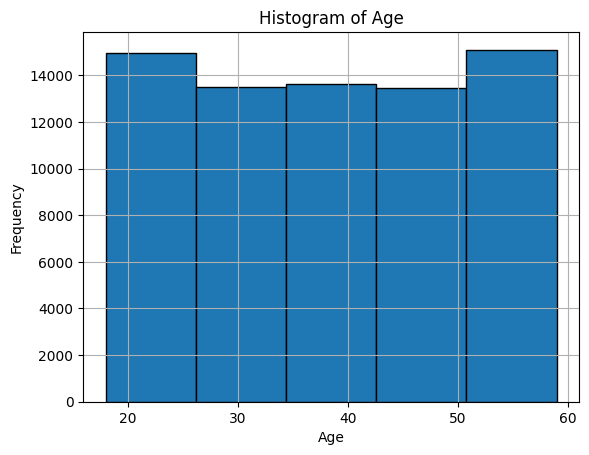

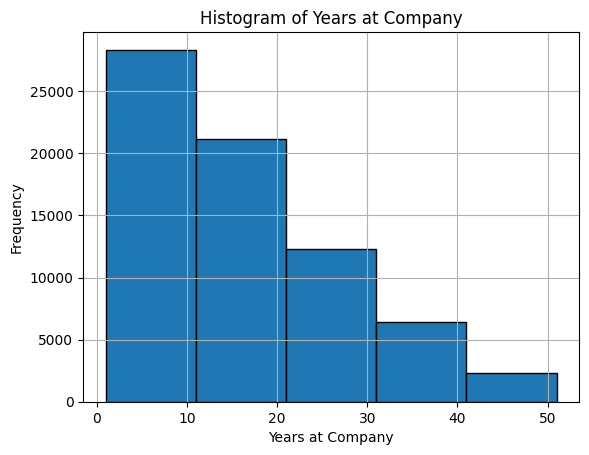

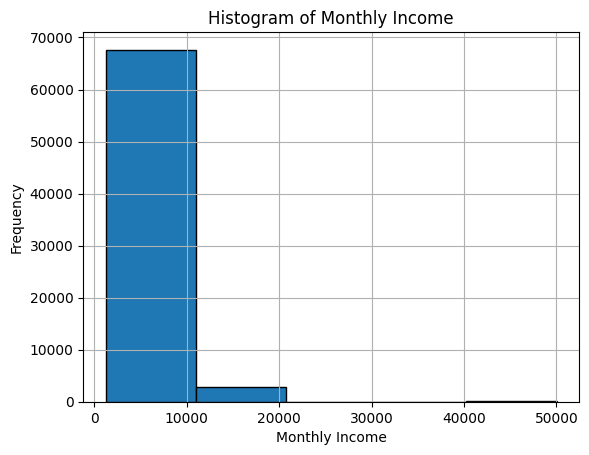

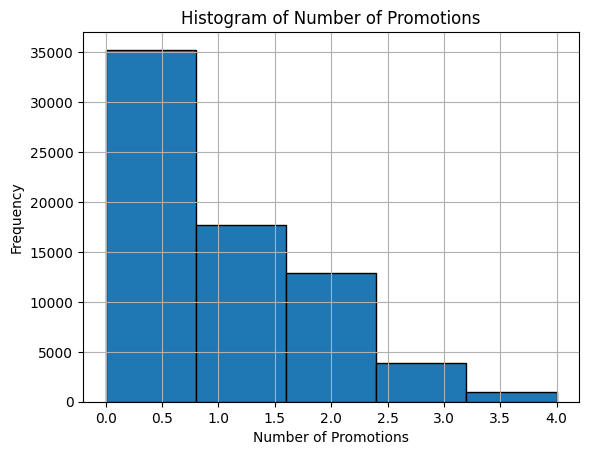

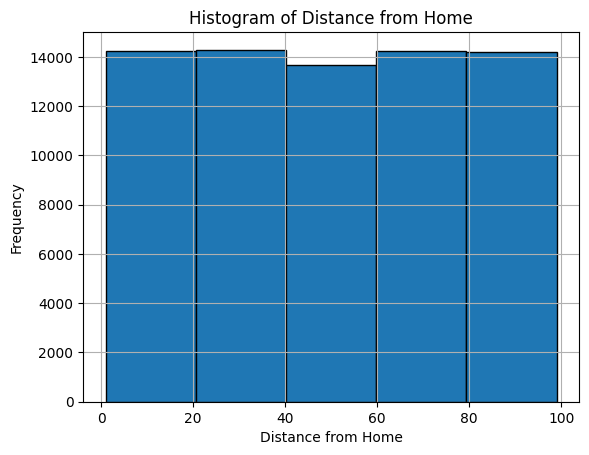

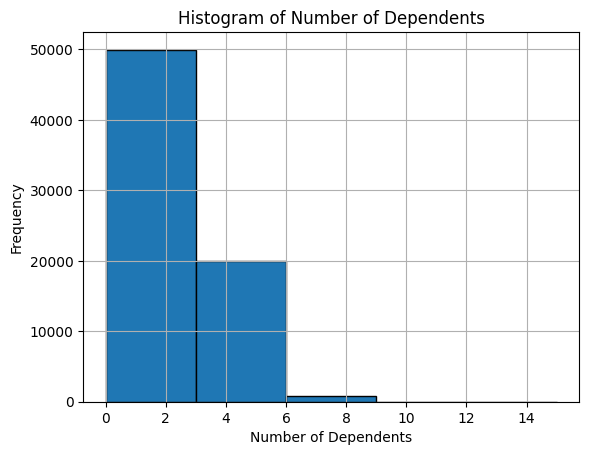

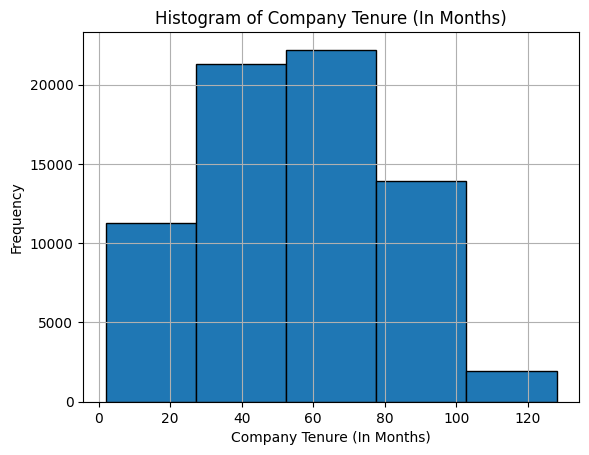

In [284]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

for i in num_col:
  # Plot histogram
  df[i].hist(bins=5, edgecolor='black')
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {i}')
  plt.show()

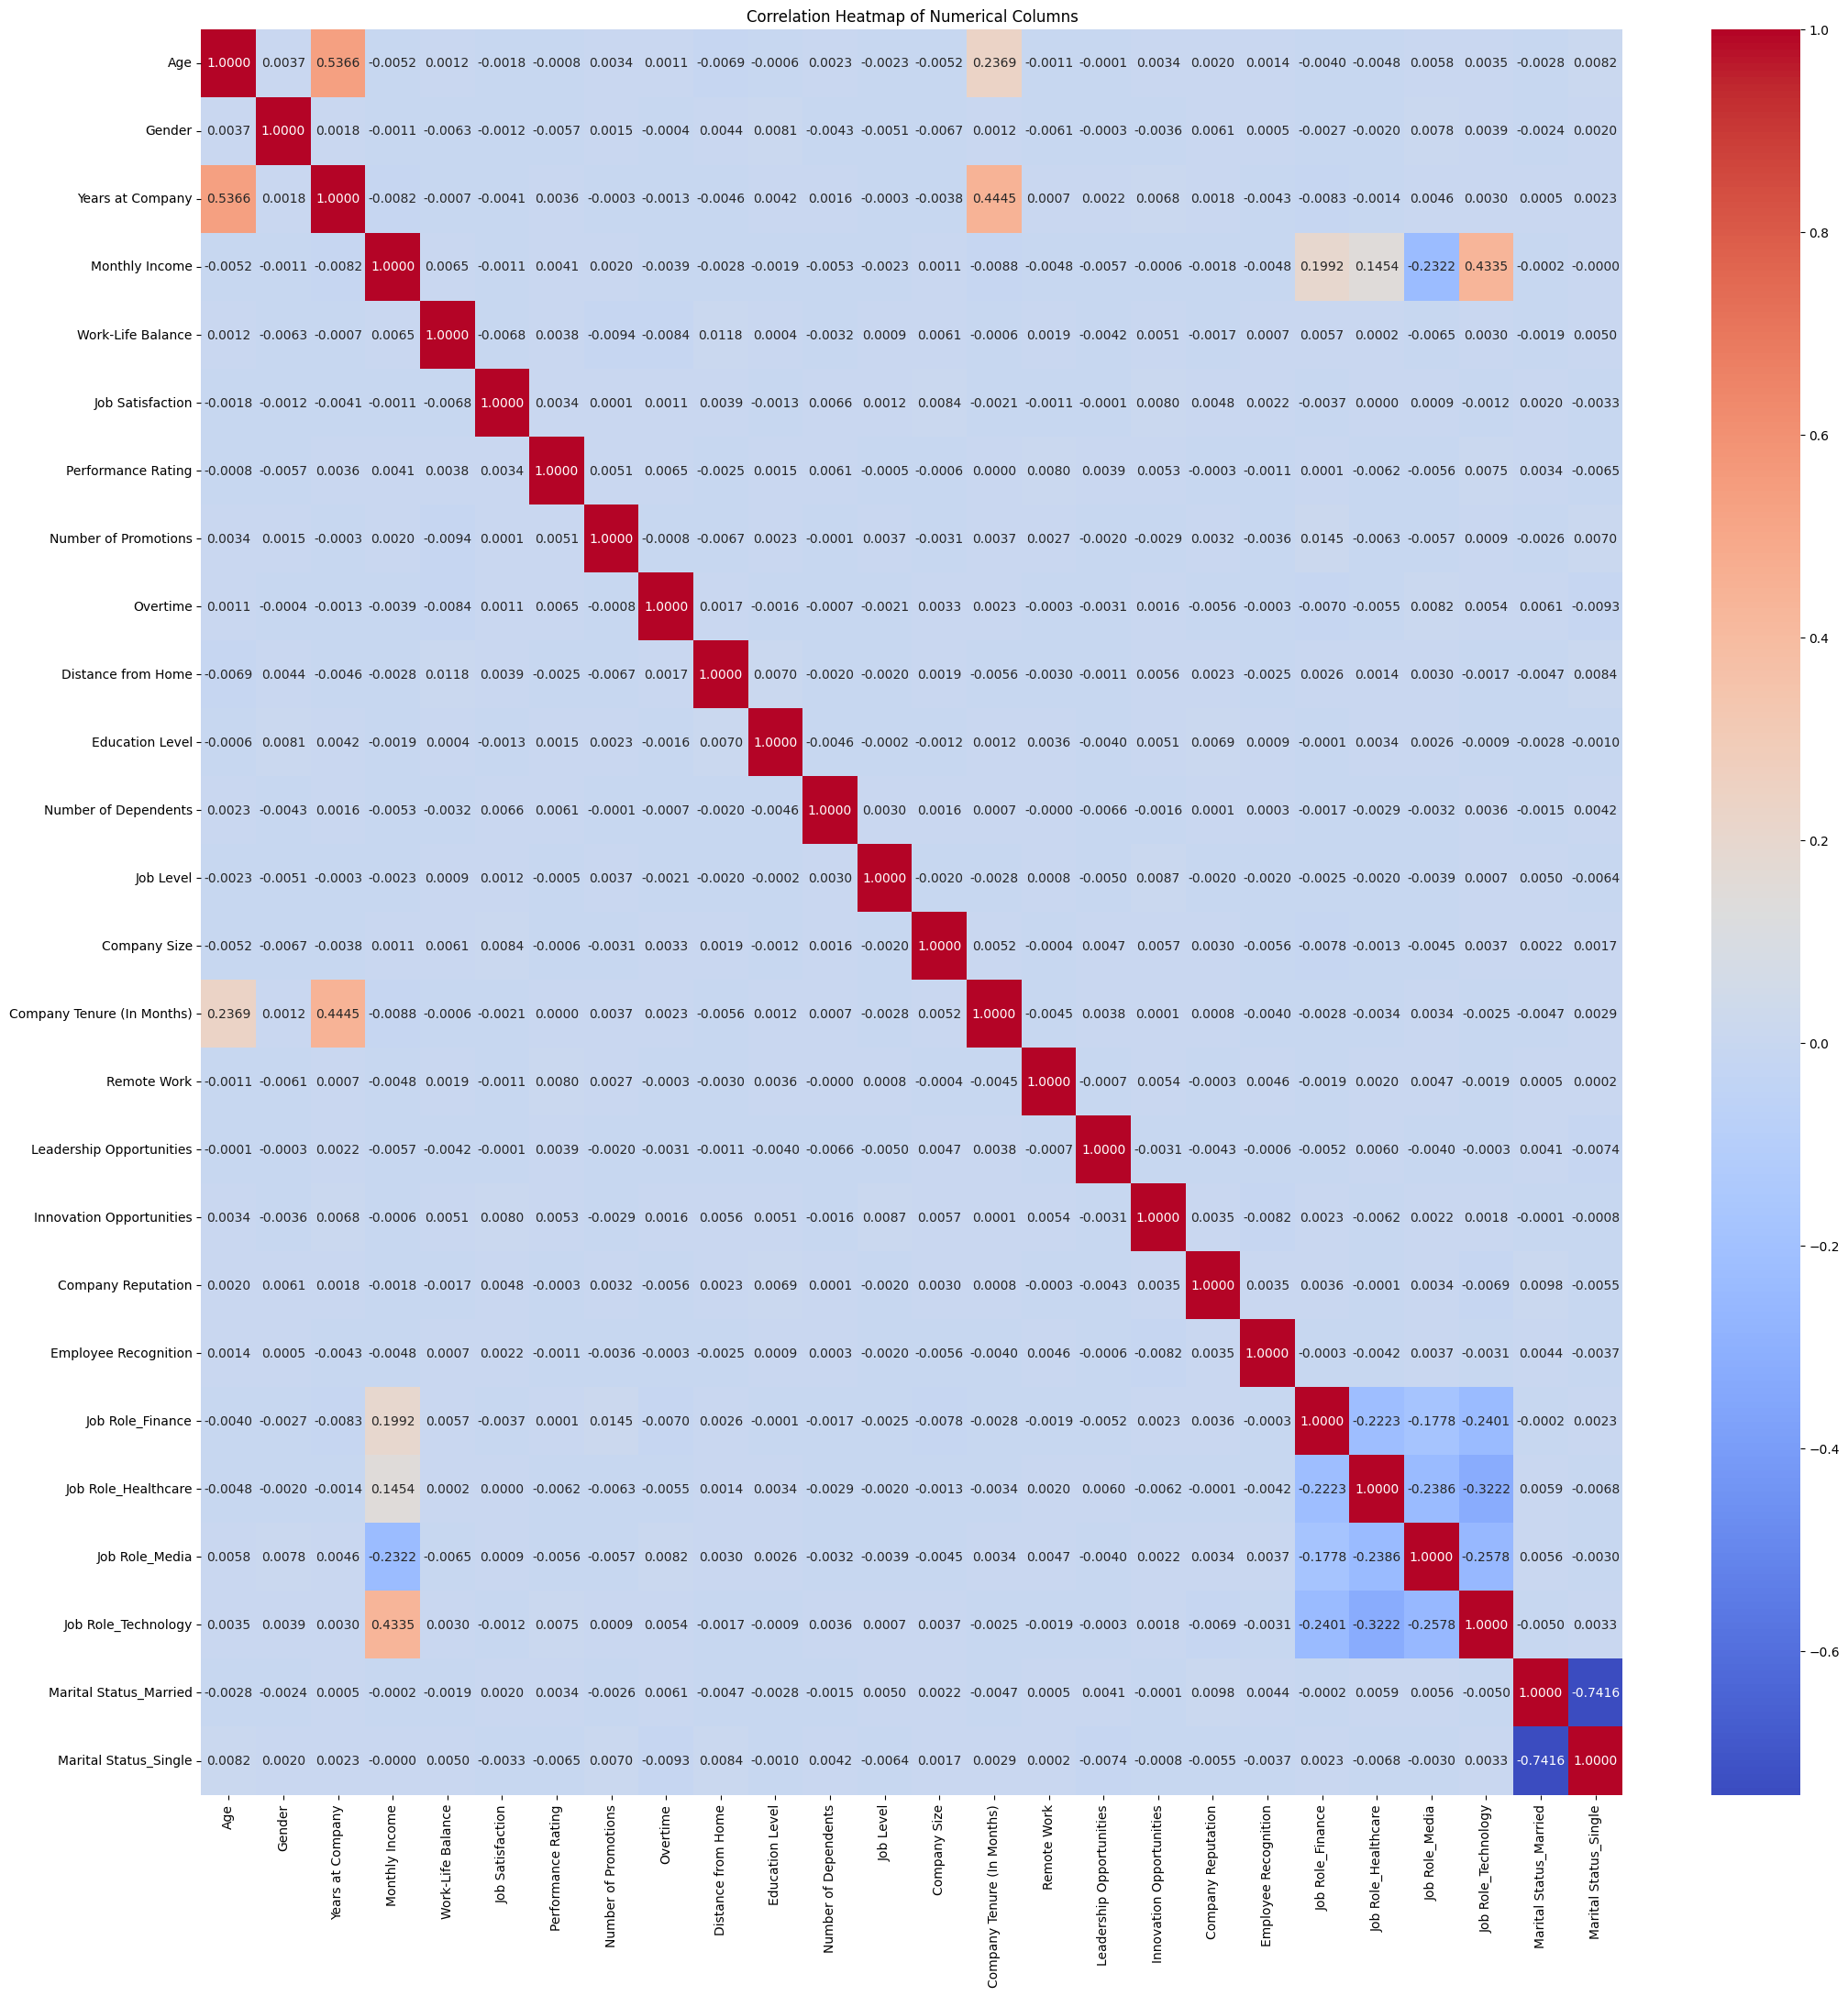

In [285]:
# Create correlation matrix for numerical columns
corr_matrix = X_train.corr()

# Plot Heatmap of the correlation matrix
plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

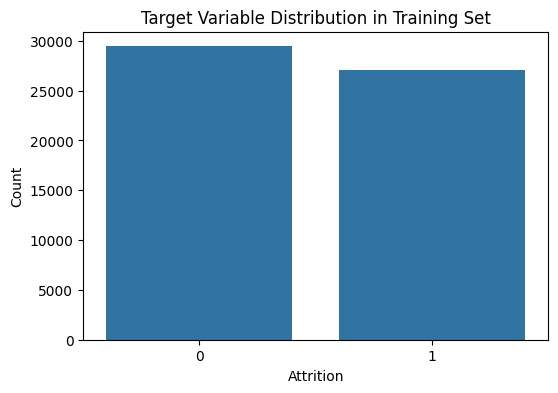

In [286]:
# Plot a bar chart to check class balance
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title('Target Variable Distribution in Training Set')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [287]:
# Bivariate analysis on training data between all the categorical columns and target variable
# Contingency table
for i in X_train.columns:
  if i not in num_col:
    print(i)
    print(pd.crosstab(X_train[i], y_train))
    print()

Gender
Attrition      0      1
Gender                 
0          17618  13449
1          11824  13617

Work-Life Balance
Attrition              0      1
Work-Life Balance              
0                   3117   4741
1                   7167  10004
2                  12674   8652
3                   6484   3669

Job Satisfaction
Attrition             0      1
Job Satisfaction              
0                  2651   3000
1                  6047   5094
2                 15435  12909
3                  5309   6063

Performance Rating
Attrition               0      1
Performance Rating              
0                    1194   1635
1                    4074   4381
2                   18113  15799
3                    6061   5251

Overtime
Attrition      0      1
Overtime               
0          20623  17493
1           8819   9573

Education Level
Attrition            0      1
Education Level              
-1               14413  13976
 0                5657   5445
 1                718

### **2.4. Feature Scaling**

In [288]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import MinMaxScaler

In [289]:
# Feature scaling
scale_cols = ["Age", "Years at Company", "Monthly Income", "Work-Life Balance", "Job Satisfaction", "Number of Promotions",
              "Education Level", "Number of Dependents", "Job Level", "Company Tenure (In Months)", "Company Reputation", "Distance from Home", "Employee Recognition"]

# Initialize scaler
scaler = MinMaxScaler()

# Fit on training data only
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])

# Transform test data using the same scaler
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

## **3. Logistic Regression**

### **3.1. Stats Model**

In [290]:
from statsmodels.tools import add_constant as add_constant

# Add intercept term
df_constant = add_constant(X_train)
df_constant.head()

,const,Age,Gender,Years at Company,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Marital Status_Married,Marital Status_Single
37016,1.0,0.878049,1,0.70,0.196644,0.333333,0.666667,2,0.00,1,...,0,0,0.666667,0.666667,0,0,0,1,0,1
27783,1.0,0.000000,1,0.14,0.106385,0.333333,1.000000,2,0.50,1,...,0,0,0.666667,0.666667,0,1,0,0,0,0
45998,1.0,0.682927,1,0.52,0.122756,0.000000,1.000000,1,0.25,1,...,0,0,0.000000,0.333333,0,0,0,1,0,1
66365,1.0,0.097561,0,0.00,0.148717,1.000000,0.666667,2,0.00,0,...,0,0,0.666667,0.666667,0,0,0,1,1,0
13960,1.0,0.146341,1,0.06,0.127797,0.333333,0.666667,3,0.00,0,...,0,0,0.666667,0.666667,0,0,0,1,1,0


In [291]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1) # select single largest p-value
        if largest_pvalue[0]<(0.05):
            print(result.summary())
            return col_list
            break
        else:
            print("Removed ", largest_pvalue)
            col_list=col_list.drop(largest_pvalue.index)


In [292]:
# Get features where p < 0.05
col_list=back_feature_elem(df_constant,y_train,X_train.columns)

print(len(col_list))

Removed  Job Role_Healthcare    0.842
dtype: float64
Removed  Company Size    0.612
dtype: float64
Removed  Age    0.405
dtype: float64
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                56508
Model:                          Logit   Df Residuals:                    56485
Method:                           MLE   Df Model:                           22
Date:                Thu, 16 Oct 2025   Pseudo R-squ.:                  0.2581
Time:                        13:36:16   Log-Likelihood:                -29023.
converged:                       True   LL-Null:                       -39118.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Gender                         0.6764     

In [293]:
# Keep only selected features in train and test dataframes

for i in X_train.columns:
  if i not in col_list:
    X_train = X_train.drop(i, axis=1)
    X_test = X_test.drop(i, axis=1)

X_train.head()

,Gender,Years at Company,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,...,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Job Role_Finance,Job Role_Media,Job Role_Technology,Marital Status_Married,Marital Status_Single
37016,1,0.70,0.196644,0.333333,0.666667,2,0.00,1,0.173469,0.4,...,0,0,0,0.666667,0.666667,0,0,1,0,1
27783,1,0.14,0.106385,0.333333,1.000000,2,0.50,1,0.959184,0.2,...,1,0,0,0.666667,0.666667,0,0,0,0,0
45998,1,0.52,0.122756,0.000000,1.000000,1,0.25,1,0.948980,0.0,...,0,0,0,0.000000,0.333333,0,0,1,0,1
66365,0,0.00,0.148717,1.000000,0.666667,2,0.00,0,0.418367,0.4,...,0,0,0,0.666667,0.666667,0,0,1,1,0
13960,1,0.06,0.127797,0.333333,0.666667,3,0.00,0,0.775510,0.0,...,0,0,0,0.666667,0.666667,0,0,1,1,0


### **3.2. Feature Selection and Scikit Learn model**


#### **3.2.1. VIF**

In [294]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_new = X_train
X_new = sm.add_constant(X_train)

vif_data = pd.DataFrame()
vif_data['Feature'] = X_new.columns
vif_data['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
print(vif_data.sort_values(by='VIF', ascending=False))

                       Feature        VIF
0                        const  44.517998
23       Marital Status_Single   2.222670
22      Marital Status_Married   2.222344
21         Job Role_Technology   1.522130
3               Monthly Income   1.404276
19            Job Role_Finance   1.269996
2             Years at Company   1.246642
13  Company Tenure (In Months)   1.246524
20              Job Role_Media   1.149909
4            Work-Life Balance   1.000580
7         Number of Promotions   1.000559
16    Innovation Opportunities   1.000484
9           Distance from Home   1.000480
8                     Overtime   1.000431
6           Performance Rating   1.000414
1                       Gender   1.000403
17          Company Reputation   1.000367
15    Leadership Opportunities   1.000323
10             Education Level   1.000306
11        Number of Dependents   1.000300
5             Job Satisfaction   1.000263
14                 Remote Work   1.000254
12                   Job Level   1

In [295]:
# If VIF > 5, remove features

#### **3.2.2. Scikit Learn Model**

In [296]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression

# Initialize and fit model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_train)

# Accuracy
print("Accuracy:", model.score(X_train, y_train))

Accuracy: 0.7440362426559072


In [297]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [2.59999518]
Coefficients: [[ 0.58887322 -0.85282635 -0.34446132 -1.78949461  0.11335129 -0.1806965
  -1.01585448  0.36398293  0.96149582 -0.99030272 -2.1269198  -2.42227823
  -0.03186355 -1.69409136 -0.19699093 -0.12716101 -0.97135468 -0.07631559
  -0.06120508 -0.07712319 -0.02927225 -0.23965385  1.52680544]]


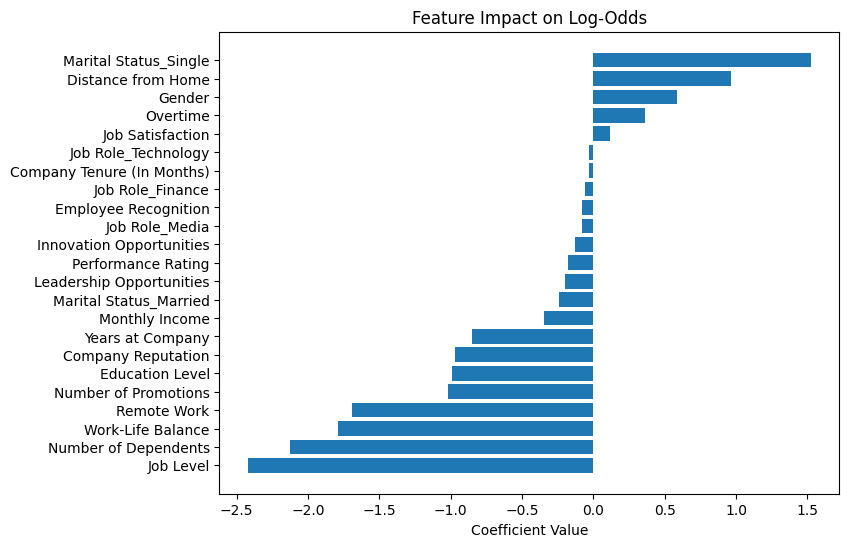

In [298]:
# Plot the coefficients
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient')

plt.figure(figsize=(8,6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.title("Feature Impact on Log-Odds")
plt.xlabel("Coefficient Value")
plt.show()

#### **3.2.2. RFE**

In [299]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(estimator=model, n_features_to_select=15)

In [300]:
model = LogisticRegression(max_iter=1000)

# Display the features selected by RFE
rfe.fit(X_train, y_train)

# 3. Transform both train and test sets
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# 4. Fit the final model on reduced train set and evaluate
model.fit(X_train_rfe, y_train)
y_pred_rfe = model.predict(X_train_rfe)

In [302]:
from sklearn.pipeline import Pipeline

# Base estimators
rfe_estimator = LogisticRegression(max_iter=1000)
final_estimator = LogisticRegression(max_iter=1000)

# RFE for feature selection
rfe = RFE(estimator=rfe_estimator, n_features_to_select=15)

# Pipeline
pipeline = Pipeline([
    ('feature_selection', rfe),
    ('model', final_estimator)
])

# Fit pipeline on full training data
pipeline.fit(X_train, y_train)

# Access logistic regression iterations
print(pipeline.named_steps['model'].n_iter_)

# Access RFE-selected features
selected_features_mask = pipeline.named_steps['feature_selection'].support_
selected_features = X_train.columns[selected_features_mask]
print(selected_features)


[29]
Index(['Gender', 'Years at Company', 'Monthly Income', 'Work-Life Balance',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Education Level', 'Number of Dependents', 'Job Level', 'Remote Work',
       'Leadership Opportunities', 'Company Reputation',
       'Marital Status_Married', 'Marital Status_Single'],
      dtype='object')


In [303]:
# Put columns selected by RFE into variable 'col'
col_rfe = X_train.columns[rfe.support_]
col_rfe

Index(['Gender', 'Years at Company', 'Monthly Income', 'Work-Life Balance',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Education Level', 'Number of Dependents', 'Job Level', 'Remote Work',
       'Leadership Opportunities', 'Company Reputation',
       'Marital Status_Married', 'Marital Status_Single'],
      dtype='object')

In [304]:
# Select only the columns selected by RFE
for i in X_train.columns:
  if i not in col_rfe:
    X_train = X_train.drop(i, axis=1)
    X_test = X_test.drop(i, axis=1)

In [305]:
# Initialize and fit model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_train)

# Accuracy
print("Accuracy:", model.score(X_train, y_train))

Accuracy: 0.7424081545975791


## **4. Evaluation**

### **4.1. Confusion Matrix**

In [306]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_pred)
print(cm)

[[22350  7092]
 [ 7464 19602]]


In [307]:
# Create variables for true positive, true negative, false positive and false negative
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

### **4.2. Sensitivity and Specificity**

In [308]:
# Calculate sensitivity
sensitivity = tp / (tp+fn)

In [309]:
# Calculate specificity
specificity = tn / (tn+fp)

In [310]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs

# Define cutoff thresholds (0.0 to 1.0 in steps of 0.05)
cutoffs = np.arange(0.0, 1.05, 0.05)
metrics_list = []

y_pred_prob = model.predict_proba(X_train)[:, 1]

for cutoff in cutoffs:
    # Convert probabilities to class predictions
    y_pred = (y_pred_prob >= cutoff).astype(int)

    # Get confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

    # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0   # Recall
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    metrics_list.append([cutoff, accuracy, sensitivity, specificity])

# Create DataFrame
threshold_df = pd.DataFrame(metrics_list, columns=['Threshold', 'Accuracy', 'Sensitivity', 'Specificity'])

# Display DataFrame
print(threshold_df)

    Threshold  Accuracy  Sensitivity  Specificity
0        0.00  0.478976     1.000000     0.000000
1        0.05  0.525111     0.998929     0.089532
2        0.10  0.582767     0.992943     0.205693
3        0.15  0.628159     0.978534     0.306059
4        0.20  0.663818     0.955368     0.395795
5        0.25  0.691371     0.926809     0.474934
6        0.30  0.711085     0.893409     0.543475
7        0.35  0.725154     0.857090     0.603865
8        0.40  0.734144     0.815747     0.659126
9        0.45  0.740568     0.771374     0.712248
10       0.50  0.742408     0.724230     0.759120
11       0.55  0.739931     0.672541     0.801882
12       0.60  0.732533     0.614424     0.841111
13       0.65  0.721845     0.554349     0.875824
14       0.70  0.708678     0.491133     0.908668
15       0.75  0.689778     0.420417     0.937402
16       0.80  0.664897     0.342755     0.961042
17       0.85  0.634689     0.257482     0.981455
18       0.90  0.596004     0.162085     0.994905


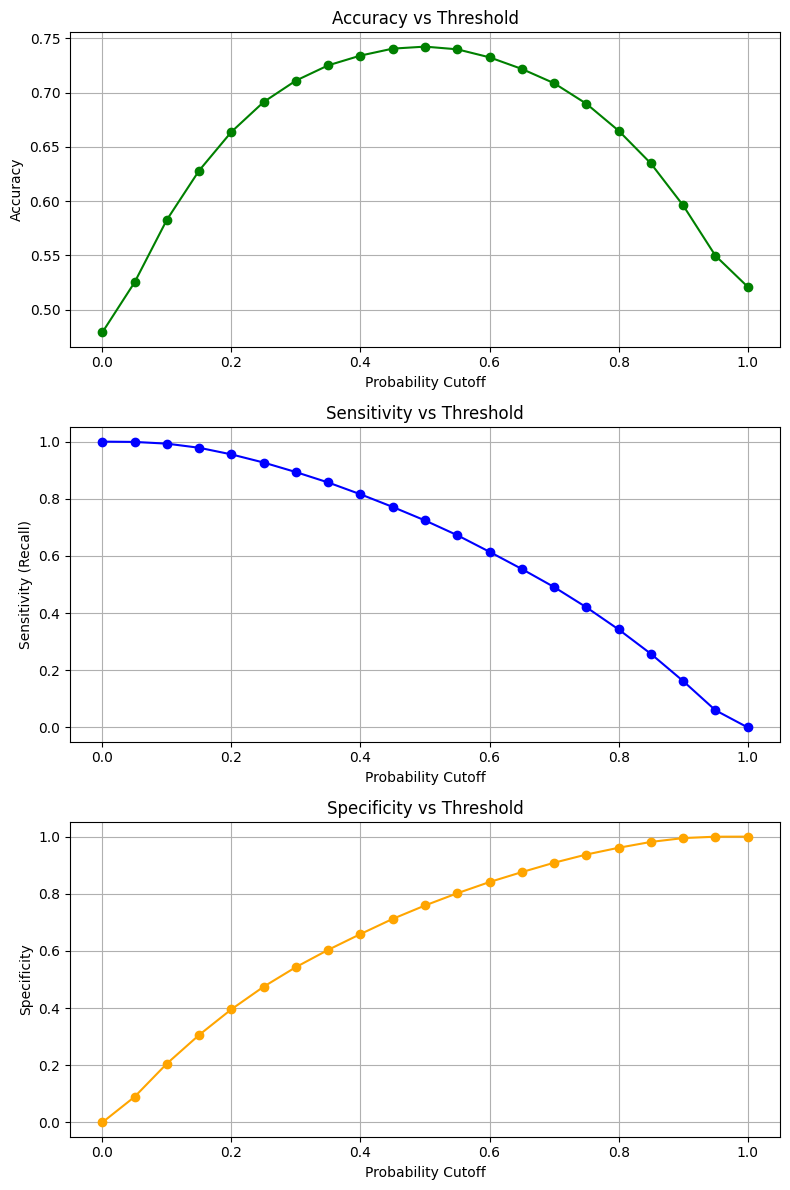

In [311]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Accuracy plot
axes[0].plot(threshold_df['Threshold'], threshold_df['Accuracy'], marker='o', color='green')
axes[0].set_title('Accuracy vs Threshold')
axes[0].set_xlabel('Probability Cutoff')
axes[0].set_ylabel('Accuracy')
axes[0].grid(True)

# Sensitivity plot
axes[1].plot(threshold_df['Threshold'], threshold_df['Sensitivity'], marker='o', color='blue')
axes[1].set_title('Sensitivity vs Threshold')
axes[1].set_xlabel('Probability Cutoff')
axes[1].set_ylabel('Sensitivity (Recall)')
axes[1].grid(True)

# Specificity plot
axes[2].plot(threshold_df['Threshold'], threshold_df['Specificity'], marker='o', color='orange')
axes[2].set_title('Specificity vs Threshold')
axes[2].set_xlabel('Probability Cutoff')
axes[2].set_ylabel('Specificity')
axes[2].grid(True)

plt.tight_layout()
plt.show()

### **4.3. Precision and Recall**

In [312]:
# Calculate precision
precision = tp / (tp+fp)

In [313]:
# Calculate recall
recall = tp / (tp+fn)

### **4.4. ROC - AUC**

In [314]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = model.predict_proba(X_train)[:, 1]

# Get FPR, TPR and thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)

# Compute AUC (Area Under Curve)
auc_score = roc_auc_score(y_train, y_pred_prob)

In [315]:
# Youden’s J Statistic
J = tpr - fpr
ix = np.argmax(J)
best_threshold = thresholds[ix]

print(f"Best threshold = {best_threshold:.3f}")
print(f"Sensitivity = {tpr[ix]:.3f}, Specificity = {1 - fpr[ix]:.3f}")

Best threshold = 0.460
Sensitivity = 0.763, Specificity = 0.722


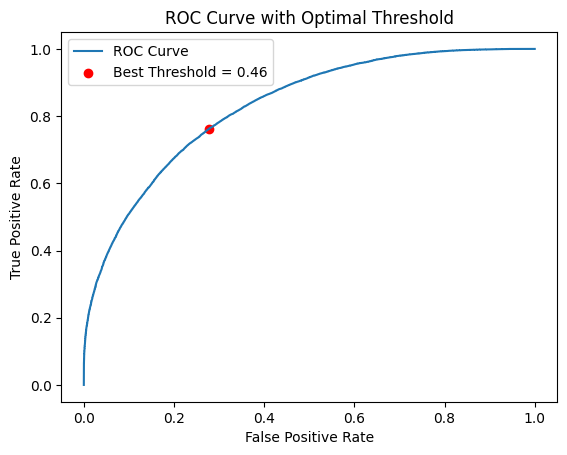

In [316]:
# Plot
plt.plot(fpr, tpr, label='ROC Curve')
plt.scatter(fpr[ix], tpr[ix], color='red', label=f'Best Threshold = {best_threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Optimal Threshold')
plt.legend()
plt.show()

## **5. Model performance with best threshold**

In [317]:
# Create a column for final prediction based on the optimal cutoff
y_pred_new = (y_pred_prob >= best_threshold).astype(int)

In [318]:
# Create the confusion matrix once again
cm = confusion_matrix(y_train, y_pred_new)
print(cm)

[[21253  8189]
 [ 6413 20653]]


In [319]:
# Create variables for true positive, true negative, false positive and false negative
tn, fp, fn, tp = confusion_matrix(y_train, y_pred_new).ravel()

In [320]:
# Accuracy
accuracy = (tp+tn) / (tp+tn+fp+fn)

# Precision
precision = tp / (tp+fp)

# Recall
recall = tp / (tp+fn)

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Calculate Sensitivity
sensitivity = tp / (tp+fn)

# Calculate Specificity
specificity = tn / (tn+fp)

In [321]:
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)

Accuracy:  0.7415941105684151
Precision:  0.7160737812911726
Recall:  0.7630606665188798
F1 Score:  0.7388209200829936
Sensitivity:  0.7630606665188798
Specificity:  0.7218599279940221


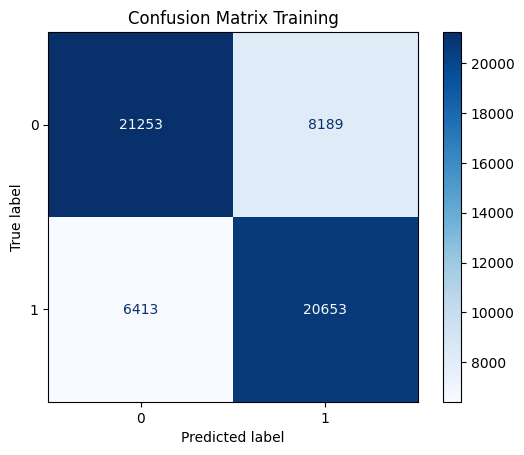

In [322]:
cm = confusion_matrix(y_train, y_pred_new)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix Training")
plt.show()

## **6. Prediction and model evaluation**

In [323]:
y_pred_test = model.predict(X_test)

In [324]:
# Get probability values
y_pred_test_prob = model.predict_proba(X_test)[:, 1]

# Create a column for final prediction based on the optimal cutoff
y_pred_test_new = (y_pred_test_prob >= best_threshold).astype(int)

In [325]:
# Evaluation
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test_new).ravel()

# Accuracy
accuracy = (tp+tn) / (tp+tn+fp+fn)

# Precision
precision = tp / (tp+fp)

# Recall
recall = tp / (tp+fn)

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Calculate Sensitivity
sensitivity = tp / (tp+fn)

# Calculate Specificity
specificity = tn / (tn+fp)

In [326]:
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)

Accuracy:  0.7391519784809231
Precision:  0.7126452684006641
Recall:  0.7620949844651576
F1 Score:  0.7365410738542932
Sensitivity:  0.7620949844651576
Specificity:  0.7181053203040174


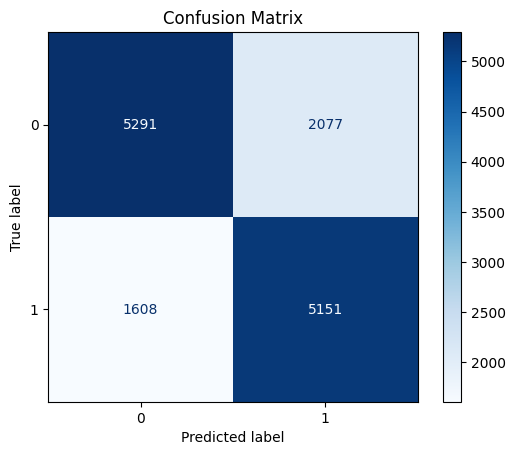

In [327]:
cm = confusion_matrix(y_test, y_pred_test_new)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()